In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.metrics import mutual_info_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
import matplotlib.pyplot as plt

In [2]:
data = 'https://raw.githubusercontent.com/alexeygrigorev/datasets/master/AB_NYC_2019.csv'

In [3]:
# !python -m wget $data -o ab_nyc_2019.csv

In [4]:
df = pd.read_csv('ab_nyc_2019.csv')

In [5]:
cols = [
    'neighbourhood_group',
    'room_type',
    'latitude',
    'longitude',
    'price',
    'minimum_nights',
    'number_of_reviews',
    'reviews_per_month',
    'calculated_host_listings_count',
    'availability_365'
]

In [6]:
df = df[cols]

In [7]:
df.isnull().sum()

neighbourhood_group                   0
room_type                             0
latitude                              0
longitude                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [8]:
df = df.fillna(0)

# Question 1
* What is the most frequent observation (mode) for the column 'neighbourhood_group'?
## Split the data
* Split your data in train/val/test sets, with 60%/20%/20% distribution.
*Use Scikit-Learn for that (the train_test_split function) and set the seed to 42.
* Make sure that the target value ('price') is not in your dataframe.

In [9]:
df['neighbourhood_group'].mode()

0    Manhattan
dtype: object

In [10]:
y = df.price

In [11]:
samples_per_bin, bins, = np.histogram(df.price, bins='doane')    # Doane's method worked best for me
samples_per_bin

array([46456,  1862,   346,    60,    50,    38,     6,    19,    15,
           2,     6,     7,     2,     0,     8,     0,     2,     1,
           3,     1,     2,     1,     1,     1,     0,     0,     0,
           6], dtype=int64)

In [12]:
bins = np.linspace(0, 506, 50)


In [13]:
y_binned = np.digitize(df.price, bins)


In [14]:
df['bin'] = y_binned

In [15]:
df_full_train, df_test, y_full, y_test = train_test_split(df, y, test_size=0.2, stratify=df.bin, random_state=42)


In [16]:
df_train, df_val, y_train, y_val = train_test_split(df_full_train, y_full, test_size=0.25, stratify=df_full_train.bin, random_state=42)

<AxesSubplot:xlabel='price', ylabel='Count'>

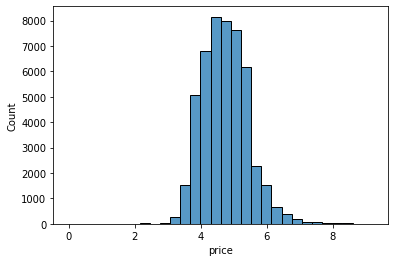

In [17]:
sns.histplot(data = np.log1p(df.price), bins=30)

<AxesSubplot:xlabel='price', ylabel='Count'>

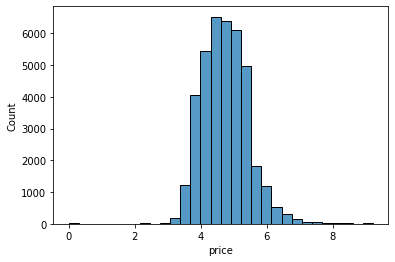

In [18]:
sns.histplot(data = np.log1p(df_full_train.price), bins=30)

<AxesSubplot:xlabel='price', ylabel='Count'>

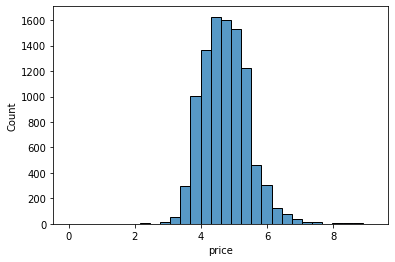

In [19]:
sns.histplot(data = np.log1p(df_test.price), bins=30)

In [20]:
y

0        149
1        225
2        150
3         89
4         80
        ... 
48890     70
48891     40
48892    115
48893     55
48894     90
Name: price, Length: 48895, dtype: int64

In [21]:
X_train = df_train.drop(['price', 'bin'],axis=1)
X_test = df_test.drop(['price', 'bin'],axis=1)
X_val = df_val.drop(['price', 'bin'],axis=1)
X_full_train = df_full_train.drop(['price', 'bin'],axis=1)

In [22]:
X_train

,neighbourhood_group,room_type,latitude,longitude,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
38942,Brooklyn,Private room,40.68726,-73.93289,30,0,0.00,27,312
33735,Brooklyn,Shared room,40.69439,-73.95518,3,14,1.24,34,361
33067,Brooklyn,Entire home/apt,40.67415,-73.96291,2,2,0.70,1,12
40851,Manhattan,Entire home/apt,40.75124,-73.99523,5,6,1.10,1,8
43656,Manhattan,Private room,40.74501,-73.98319,10,0,0.00,2,89
...,...,...,...,...,...,...,...,...,...
3558,Brooklyn,Private room,40.63592,-74.00476,1,98,1.55,5,0
6096,Manhattan,Entire home/apt,40.72421,-73.99304,3,66,1.24,1,0
27984,Manhattan,Entire home/apt,40.74998,-73.97543,30,3,0.21,50,365
47183,Brooklyn,Private room,40.73259,-73.95611,3,1,1.00,1,65


# Question 2
* Create the correlation matrix for the numerical features of your train dataset.
* * In a correlation matrix, you compute the correlation coefficient between every pair of features in the dataset.
* What are the two features that have the biggest correlation in this dataset?

<AxesSubplot:>

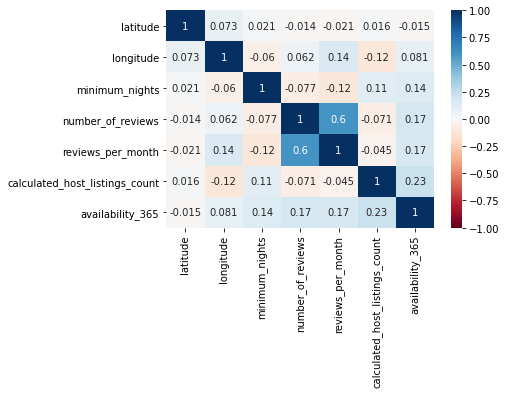

In [23]:
sns.heatmap(X_train.corr(), annot=True, cmap='RdBu', vmin=-1, vmax=1)

# reviews_per_month and number_of_reviews are highly ccorrelated 

# Make price binary
* We need to turn the price variable from numeric into binary.
* Let's create a variable above_average which is 1 if the price is above (or equal to) 152.

In [24]:
# X_train['above_average'] = y_train.apply(lambda x: 1 if x > 152 else 0)
# X_test['above_average'] = y_test.apply(lambda x: 1 if x > 152 else 0)
# X_val['above_average'] = y_val.apply(lambda x: 1 if x > 152 else 0)


# Question 3
- Calculate the mutual information score with the (binarized) price for the two categorical variables that we have. Use the training set only.
- Which of these two variables has bigger score?
- Round it to 2 decimal digits using round(score, 2)

In [25]:
X_train

,neighbourhood_group,room_type,latitude,longitude,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
38942,Brooklyn,Private room,40.68726,-73.93289,30,0,0.00,27,312
33735,Brooklyn,Shared room,40.69439,-73.95518,3,14,1.24,34,361
33067,Brooklyn,Entire home/apt,40.67415,-73.96291,2,2,0.70,1,12
40851,Manhattan,Entire home/apt,40.75124,-73.99523,5,6,1.10,1,8
43656,Manhattan,Private room,40.74501,-73.98319,10,0,0.00,2,89
...,...,...,...,...,...,...,...,...,...
3558,Brooklyn,Private room,40.63592,-74.00476,1,98,1.55,5,0
6096,Manhattan,Entire home/apt,40.72421,-73.99304,3,66,1.24,1,0
27984,Manhattan,Entire home/apt,40.74998,-73.97543,30,3,0.21,50,365
47183,Brooklyn,Private room,40.73259,-73.95611,3,1,1.00,1,65


In [26]:
categorical = X_train.select_dtypes(exclude='number').columns
categorical

Index(['neighbourhood_group', 'room_type'], dtype='object')

In [27]:
numerical = X_train.select_dtypes(include='number').columns
numerical 

Index(['latitude', 'longitude', 'minimum_nights', 'number_of_reviews',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [28]:
def mutual_info_churn_score(series):
    return mutual_info_score(series, y_train)

In [29]:
mi = X_train[categorical].apply(mutual_info_churn_score)
round(mi.sort_values(ascending=False), 2)

room_type              0.32
neighbourhood_group    0.11
dtype: float64

# Question 4
- Now let's train a logistic regression
- Remember that we have two categorical variables in the data. Include them using one-hot encoding.
- Fit the model on the training dataset.
- * To make sure the results are reproducible across different versions of Scikit-Learn, fit the model with these parameters:
- * model = LogisticRegression(solver='lbfgs', C=1.0, random_state=42)
- Calculate the accuracy on the validation dataset and round it to 2 decimal digits.

In [30]:
y_train = y_train.apply(lambda x: 1 if x > 152 else 0)
y_val = y_val.apply(lambda x: 1 if x > 152 else 0)
y_test = y_test.apply(lambda x: 1 if x > 152 else 0)

In [31]:
from sklearn.feature_extraction import DictVectorizer

In [32]:
categorical = list(X_train.select_dtypes(exclude='number'))

In [33]:
numerical = list(X_train.select_dtypes('number'))
numerical

['latitude',
 'longitude',
 'minimum_nights',
 'number_of_reviews',
 'reviews_per_month',
 'calculated_host_listings_count',
 'availability_365']

In [34]:
dicts_train = X_train[categorical+numerical].to_dict(orient='records')

In [35]:
dv = DictVectorizer(sparse=False)
X_train = dv.fit_transform(dicts_train)

In [36]:
model = LogisticRegression(solver='lbfgs', C=1.0, random_state=42,max_iter=2000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=2000, random_state=42)

In [37]:
dicts_val = X_val[categorical+numerical].to_dict(orient='records')
X_val = dv.transform(dicts_val)
val_preds = model.predict(X_val)

In [38]:
(val_preds == y_val).mean()

0.7967072297780959

In [39]:
dicts_full_train = X_full_train[categorical+numerical].to_dict(orient='records')
X_full_train = dv.fit_transform(dicts_full_train)
model.fit(X_train, y_train)

LogisticRegression(max_iter=2000, random_state=42)

In [40]:
dicts_test= X_test[categorical+numerical].to_dict(orient='records')
X_test = dv.fit_transform(dicts_test)
test_preds = model.predict(X_test)
(test_preds == y_test).mean()

0.7982411289497904

# Question 5
- We have 9 features: 7 numerical features and 2 categorical.
- Let's find the least useful one using the feature elimination technique.
- Train a model with all these features (using the same parameters as in Q4).
- Now exclude each feature from this set and train a model without it. Record the accuracy for each model.
- For each feature, calculate the difference between the original accuracy and the accuracy without the feature.
- Which of following feature has the smallest difference?
- neighbourhood_group
- room_type
- number_of_reviews
- reviews_per_month

In [41]:
previous_score = (val_preds == y_val).mean()
previous_score

0.7967072297780959

In [42]:
useful_cols = categorical+numerical

In [43]:
X_train

array([[312.     ,  27.     ,  40.68726, ...,   0.     ,   1.     ,
          0.     ],
       [361.     ,  34.     ,  40.69439, ...,   0.     ,   0.     ,
          1.     ],
       [ 12.     ,   1.     ,  40.67415, ...,   1.     ,   0.     ,
          0.     ],
       ...,
       [365.     ,  50.     ,  40.74998, ...,   1.     ,   0.     ,
          0.     ],
       [ 65.     ,   1.     ,  40.73259, ...,   0.     ,   1.     ,
          0.     ],
       [365.     ,   1.     ,  40.72592, ...,   1.     ,   0.     ,
          0.     ]])

In [44]:
X_train = df_train.drop(['price', 'bin'],axis=1)
X_test = df_test.drop(['price', 'bin'],axis=1)
X_val = df_val.drop(['price', 'bin'],axis=1)
X_full_train = df_full_train.drop(['price', 'bin'],axis=1)

In [45]:
for c in useful_cols:
    # X_train[useful_cols].drop(c,axis=1)
    dicts_train = X_train[useful_cols].drop(c, axis=1).to_dict(orient='records')
    dv = DictVectorizer(sparse=False)
    X_tr = dv.fit_transform(dicts_train)

    model = LogisticRegression(solver='lbfgs', C=1.0, random_state=42,max_iter=2000)
    model.fit(X_tr, y_train)
    dicts_val = X_val[useful_cols].drop(c, axis=1).to_dict(orient='records')
    X_v = dv.transform(dicts_val)
    val_preds = model.predict(X_v)
    score = round((val_preds == y_val).mean(),5)
    diff = round(previous_score - score,5)
    print(f'Dropped: {c} score: {score}, difference: {diff}')

Dropped: neighbourhood_group score: 0.73934, difference: 0.05737
Dropped: room_type score: 0.73545, difference: 0.06126
Dropped: latitude score: 0.79221, difference: 0.0045
Dropped: longitude score: 0.79221, difference: 0.0045
Dropped: minimum_nights score: 0.79528, difference: 0.00143
Dropped: number_of_reviews score: 0.79487, difference: 0.00184
Dropped: reviews_per_month score: 0.79691, difference: -0.0002
Dropped: calculated_host_listings_count score: 0.79722, difference: -0.00051
Dropped: availability_365 score: 0.7874, difference: 0.00931


# Question 6
- For this question, we'll see how to use a linear regression model from Scikit-Learn
- We'll need to use the original column 'price'. Apply the logarithmic transformation to this column.
- Fit the Ridge regression model on the training data.
- This model has a parameter alpha. Let's try the following values: [0, 0.01, 0.1, 1, 10]
- Which of these alphas leads to the best RMSE on the validation set? Round your RMSE scores to 3 decimal digits.
- If there are multiple options, select the smallest alpha.

In [46]:
from sklearn.linear_model import Ridge

def rmse(y, y_pred):
    se =  (y- y_pred)**2
    mse = se.mean()
    return np.sqrt(mse)

In [47]:
y_full_train = np.log1p(df_full_train.price)
y_train = np.log1p(df_train.price)
y_test = np.log1p(df_test.price)
y_val = np.log1p(df_val.price)

In [48]:
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)


ValueError: could not convert string to float: 'Brooklyn'

In [ ]:
ridge_val_preds = ridge.predict(X_val)
rmse(y_val, ridge_val_preds)

0.5063562227330685

In [ ]:
for a in [0, 0.01, 0.1, 1, 10, 2, 3]:
    ridge = Ridge(alpha=a, random_state=42)
    ridge.fit(X_train, y_train)
    ridge_val_preds = ridge.predict(X_val)
    score = round(rmse(y_val, ridge_val_preds),3)
    print(f"Alpha: {a},score: {score}")

Alpha: 0,score: 0.506
Alpha: 0.01,score: 0.506
Alpha: 0.1,score: 0.506
Alpha: 1,score: 0.506
Alpha: 10,score: 0.507
Alpha: 2,score: 0.506
Alpha: 3,score: 0.507
